### **0. Introducción**

####  **0.1 Contexto**

Cuando un viajero quiere hacer una reserva de hotel quiere conocer información de otros viajeros que se hayan alojado allí previamente, pues a veces ocurre que las condiciones reales no corresponden exactamente con las fotos y descripciones que aparecen en las páginas web. De otra parte, los sitios web que ofrecen el servicio de reserva compiten por ofrecer a sus usuarios la mayor cantidad de información sobre los hoteles para ganar su fidelidad en futuras reservaciones. Con el fin de dar al usuario una información concisa que evite que éste tenga que leerse una larga lista de opiniones de los usuarios de un hotel, sería importante contar con una herramienta que de manera automática agrupe los hoteles que tienen un nivel de satisfacción de los usuarios similar. Esto permitiría que un usuario pueda identificar, o descartar, varios hoteles simultáneamente a partir de las opiniones de sus clientes previos, haciendo más rápido y sencillo el proceso de selección del hotel.

Teniendo en cuenta el contexto planteado, el caso de estudio consiste en desarrollar un modelo de aprendizaje no supervisado que procese las opiniones de usuarios en hoteles de Europa usando la información disponible en el dataset “515K Hotel Reviews Data in Europe”.

El proposito de la construcción del algoritmo es generar agrupamientos de hoteles que reciben opiniones similares de sus huespedes. En otras palabras, se desea **segmentar el conjunto de datos agrupando opiniones con similitud en algún sentido** e identificando los hoteles a los que dichas opiniones hacen referencia.

####  **0.2 Intención y precisiones de la actividad de crítica**

En un primer ejercicio a partir del contexto y problema anteriores se plantearon hipótesis iniciales, no obstante en las mismas se replanteo el problema restando relevancia al procesamiento y agrupación de comentarios, y poniendo mayor enfásis en la clusterización de hoteles.

Teniendo en cuenta que el ejercicio planteado busca introducir elementos de analitica de textos, el siguiente documento tiene como finalidad desarrollar la crítica de las hipótesis del caso mencionado. En este documento inicialmente se pondrán las hipotesis inicialmente planteadas y seguidamente se plantearán ajustes iniciales que constituyen rectificaciones a tales hipotesis teniendo en cuenta la retroalimentación recibida, en este orden de ideas en la primera rectificación de hipotesis se prescinde de de la propuesta de pre-procesamiento general y tambien se reformulan algunas de las hipotesis planteadas (que invitaban a un cambio de enfoque en el problema), esto teniendo en cuenta que no se considera valido el replanteamiento del problema hacia un enfoque centrado en el clustering puro de hoteles, sino que se busca centrar el clustering en los comentarios y su similitud como una via de asociación con los hoteles.

Una vez rectificadas las hipotesis se procede a una dinámica inicial de entendimiento de los datos y teniendo en cuenta esta se da lugar al proceso de crítica de las hipotesis la cual se basará en la versión ajustada de las mismas, en la critica se tendrán en cuenta las ventajas y desventajas de cada método y se tendrán en cuenta posibles mecanismos para evaluar objetivamente la calidad del ejercicio una vez este en fase de implementación, este ejercicio de critica dará lugar a la elección de una hipótesis que será llevada a implementación.  


### **1. Contexto del set de datos 515K Hotel Reviews Data in Europe**



Este dataset proviene de un proceso de web-scraping realizado sobre "Booking.com". El set de datos cuenta con un total de 515.000 comentarios y puntuaciones de huéspedes de 1493 hoteles de lujo a lo largo de Europa, el set de datos consolida adicionalmente elementos como el puntaje general del hotel en el momento de la reseña, la longitud y latitud del hotel e inclusive algunos atributos de los huéspedes que han realizado comentarios como la necionalidad y número de reviews hechas por cada uno.

El set de datos cuenta con 17 variables que se listan a continuación:

- Hotel_Address: Dirección del hotel [String]
- Review_Date: Fecha del comentario [String]
- Average_Score: Puntaje promedio del hotel [Float]
- Hotel_Name: Nombre del hotel [String]
- Reviewer_Nationality: Nacionalidad del usuario que comenta [String]
- Negative_Review: Comentario negativo que ha dado el usuario al hotel, en los casos en que no hay comentarios negativos se procede a usar la etiqueta "No Negative". [String]
- Review_Total_Negative_Word_Counts: Número total de palabras en el comentario negativo [String]
- Positive_Review: Comentario positivo que ha dado el usuario. Si el usuario no da un comentario positivo se usa la etiqueta "No Positive" [String]
- Review_Total_Positive_Word_Counts: Total de palabras del comentario positivo [String]
- Reviewer_Score:Puntaje dado por el usuario teniendo en cuenta su experiencia [Float]
- Total_Number_of_Reviews_Reviewer_Has_Given: Número de comentarios publicados por el usuario. [Integer]
- Total_Number_of_Reviews: Número total de comentarios con los que cuenta el hotel. [Integer]
- Tags: Tags que el usuario asigno al hotel. [Lista]
- days_since_review: Dias entre el dia del comentario y el tiempo de extracción de información de la página. [Integer]
- Additional_Number_of_Scoring: Indica número de scores sin comentario, se han dado sobre el hotel. [Integer]
- lat: Latitude of the hotel  [Float]
- lng: longtitude of the hotel [Float]

Para efectos del caso de estudio los campos que toman mas relevancia son el nombre del hotel y los campos en donde se registra el comentario del usuario tanto positivo como negativo, no obstante las demás variables sirven como complemento para el proceso de clustering que busca realizarse.



### **2. Planteamiento de hipótesis inicial y rectificación de imprecisiones iniciales**

A continuación, se presentan las hipótesis planteadas inicialmente por el equipo. Luego, se presentan el ajuste de estas hipótesis de acuerdo con las observaciones recibidas por parte de la docente.

#### **2.1 Propuesta de pre-procesamiento inicial**

Teniendo en cuenta que el set de datos tiene un marco de tiempo y que los 500.000 registros se refieren a reseñas de 1.493 hoteles, para facilitar el proceso de clustering se propone generar un dataset sumarizado en que tenga como llave de agrupación el nombre del hotel.  En este, se agruparán por promedio algunas variables numéricas como “average score”, “Reviewer score”, ”Additional number of scoring”, “Word count” y se tengan columnas de conteo para los tags (lo cual implica un proceso de tokenización y conteo de los tags).
Adicionalmente, se propone antes de generar la tabla sumarizada, aplicar sobre los reviews textuales un algoritmo pre-entrenado (del portal Hugging face)  de Análisis de sentimiento. Esto con el fin de cuantificar scores para emociones identificadas del dataset que sirvan como “nuevas variables” que enriquezcan el proceso de clustering. En la matriz sumarizada se buscaría tener únicamente variables cuantitativas que favorezcan el procesamiento de los algoritmos de clustering que se proponen.


##### **2.1.1 Ajuste al planteamiento del pre-procesamiento**

Teniendo en cuenta que el problema propuesto busca el procesamiento de las opiniones de los usuarios, en el marco del pre-procesamiento se propone llevar a cabo un proceso de tokenización de los textos asociados a los comentarios vinculado con proceso de limpieza de stopwords y de carácteres especiales que permitan transformar el texto de los comentarios en una forma que permita posteriormente asociar sus frecuencias y relevancia usando técnicas como Bag of Words (BOW) , td-idf (Term Frequency / Inverse document frequency)  o Word to Vector, la prueba de estas técnicas puede llevar a un marco de comparación más variado de clusters que podria derivar en mayor consistencia en el resultado final. El uso de las técnicas mencionadas permitiria posteriormente llevar a cabo el proceso de clustering de los comentarios conduciendo a viabilizar la resolución del problema.


#### **2.2 Hipótesis 1  - DBSCAN**

La técnica DBSCAN podría ser una buena opción para agrupar las opiniones de los usuarios en hoteles, al detectar grupos relacionados con la densidad de opiniones y aislar datos que resulten ser ruido. En este sentido, esta técnica podría identificar reseñas similares y agruparlas. Para esto, cada opinión será tratado como un punto en un espacio de características que luego serán agrupados. Lo que implicará definir la distancia máxima entre puntos para que se consideren vecinos y el número mínimo de puntos que deben estar dentro de la distancia definida para ser considerado un núcleo y forme parte de un grupo.
En términos del proceso para llevar a cabo este proceso, será la representación de las opiniones un espacio de características. Para lo que es necesario realizar un proceso de selección y transformación de los atributos más apropiados. Con este proceso realizado se puede aplicar el algoritmo de DBSCAN para que explore los puntos de acuerdo con la densidad y conectividad, así como los núcleos y grupos a partir de ellos. En este punto, se definen los puntos que se consideran ruido. Luego de este proceso, se podrá determinar que los grupos resultantes serán las opiniones de hoteles que sean similares en algunos de sus atributos.

Ahora bien, en cuanto a los requerimientos de los datos de acuerdo con las características del Data set, en el proceso de exploración de los datos se seleccionarán aquellos atributos que sean relevantes y se harán las transformaciones respectivas. Algunas características podráon ser las Negative_Review, Positive_Review, Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts, Reviewer_Score, entre otras. Para este caso, se requerirá hacer un tratamiento especial a aquellos atributos de reseñas en texto. Lo que implicará seguramente aplicar técnicas de procesamiento de lenguaje natural para realizar lematización. También, podrá ser necesario realizar normalización de algunos atributos numéricos como Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts y Reviewer_Score.

Se agregará al análisis un modelo de procesamiento con el algoritmo PCA para las variables cuantitativas que agrupe inicialmente la base de datos y también se estima procesar un análisis sin la clasificación del PCA para posteriormente revisar el cambio y la categorización realizada en ambos casos.
En suma, con el método de DBSCAN es posible realizar el proceso de agrupación de las reseñas de hoteles en Europa. A partir de este algoritmo es posible detectar grupos a partir de la densidad y conectividad entre las opiniones de los usuarios.



##### **2.2.1 Ajuste al planteamiento de la Hipótesis 1**

La técnica DBSCAN podría ser una buena opción para agrupar las opiniones de los usuarios en hoteles, al detectar grupos relacionados con la densidad de opiniones y aislar datos que resulten ser ruido. En este sentido, esta técnica podría identificar reseñas similares y agruparlas. Para esto, cada opinión será tratado como un punto en un espacio de características que luego serán agrupados. Lo que implicará definir la distancia máxima entre puntos para que se consideren vecinos y el número mínimo de puntos que deben estar dentro de la distancia definida para ser considerado un núcleo y forme parte de un grupo.
En términos del proceso para llevar a cabo este proceso, será la representación de las opiniones un espacio de características. Para lo que es necesario realizar un proceso de selección y transformación de los atributos más apropiados. Con este proceso realizado se puede aplicar el algoritmo de DBSCAN para que explore los puntos de acuerdo con la densidad y conectividad, así como los núcleos y grupos a partir de ellos. En este punto, se definen los puntos que se consideran ruido. Luego de este proceso, se podrá determinar que los grupos resultantes serán las opiniones de hoteles que sean similares en algunos de sus atributos.

Ahora bien, en cuanto a los requerimientos de los datos de acuerdo con las características del dataset y la relevancia de los datos textuales del ejercicio, se aplicaría la propuesta de pre-procesamiento ajustada buscando llevar los comentarios a una estructura que permita aplicar el algoritmo DBSCAN.

En suma, con el método de DBSCAN es posible realizar el proceso de agrupación de las reseñas de hoteles en Europa. A partir de este algoritmo es posible detectar grupos a partir de la densidad y conectividad entre las opiniones de los usuarios.


#### **2.3 Hipótesis 2  - Clustering jerarquico**

El clustering jerárquico puede ser una alternativa para la solución del problema de agrupación de los hoteles en tanto permite encontrar patrones de similitud en los datos, a partir de una jerarquía de agrupamientos de acuerdo con su similitud. Con esta técnica será posible identificar los grupos de hoteles con opiniones similares y asignarles grupos en diferentes niveles de la jerarquía. Para este caso, el algoritmo tomará los datos del set de datos sumarizado del preprocesamiento como un grupo individual, y en la medida en que avanza se fusionan los grupos por la similitud entre ellos. Así hasta que todas las opiniones quedan agrupadas en un solo grupo. Es por esto que en este caso se usará el enfoque aglomerativo.
En este caso será necesario establecer una medida de distancia o similitud que sea apropiada para comparar las opiniones. La que se definirá en el proceso exploratorio de los datos y puede basarse en el contenido de texto, calificaciones u otro atributo relevante. También será necesario establecer el punto de corte en el cual se defina el nivel de similitud apropiado. Esto permitirá seleccionar los grupos que pueden asociarse a hoteles con características similares.



##### **2.3.1 Ajuste al planteamiento de la Hipótesis 2**

El clustering jerárquico puede ser una alternativa para la solución del problema de agrupación de los hoteles en tanto permite encontrar patrones de similitud en los datos, a partir de una jerarquía de agrupamientos de acuerdo con su similitud. Con esta técnica será posible identificar los grupos de hoteles con opiniones similares y asignarles grupos en diferentes niveles de la jerarquía. Para este caso, el algoritmo tomará los datos textuales pre-procesados del set
provenientes de los comentarios como un grupo individual, y en la medida en que avanza se fusionan los grupos por la similitud entre sus términos o expresiones. Así hasta que todas las opiniones quedan agrupadas en un solo grupo. Es por esto que en este caso se usará el enfoque aglomerativo.


En este caso será necesario establecer una medida de distancia o similitud que sea apropiada para comparar las opiniones. La que se definirá en el proceso exploratorio de los datos y puede basarse en el contenido de texto, calificaciones u otro atributo relevante. También será necesario establecer el punto de corte en el cual se defina el nivel de similitud apropiado. Esto permitirá seleccionar los grupos que pueden asociarse a hoteles con características similares.

#### **2.4 Hipótesis 3 - K-medias**

El algoritmo de K-medias puede ser una buena alternativa para la agrupación de los hoteles en Europa en tanto asigna puntos a k grupos diferentes de acuerdo con la similitud de sus características. En esta técnica cada reseña se considera un punto y K-medias las agrupa con sus similares en el número de grupos establecidos. Para este caso es posible aplicar la técnica del codo o silueta para determinar el número óptimo de grupos. Lo que busca generar que la agrupación sea significativa y relevante.

En cuanto a los requerimientos de los datos, se utilizará el producto del conjunto de datos del preprocesamiento. Por otro lado, en este caso se probará con el algoritmo de K-medias tradicional y K-medias++ para comparar el desempeño.  Se espera que una vez aplicados estos algoritmos, se pueda identificar agrupaciones de hoteles en la matriz sumarizada que recojan tipos de opiniones similares entre ellos.

Esta técnica puede ser prometedora para resolver este problema, en tanto es un algoritmo relativamente simple y eficiente en términos de tiempo de ejecución. También ofrece flexibilidad en términos de la cantidad de grupos que se deseen constituir y poder procesar atributos numéricos y categóricos. Por otro lado, su comprensión es sencilla, lo que facilita la interpretación de los grupos formados. Lo que puede ser útil para identificar patrones y tomar decisiones a partir de la agrupación.



##### **2.4.1 Ajuste al planteamiento de la Hipótesis 3**

El algoritmo de K-medias puede ser una buena alternativa para la agrupación de los hoteles en Europa en tanto asigna puntos a k grupos diferentes de acuerdo con la similitud de sus características. En esta técnica cada reseña se considera un punto y K-medias las agrupa con sus similares en el número de grupos establecidos. Para este caso es posible aplicar la técnica del codo o silueta para determinar el número óptimo de grupos. Lo que busca generar que la agrupación sea significativa y relevante.

En cuanto a los requerimientos de los datos, se utilizará el producto del conjunto de datos de la propuesta de pre-procesamiento ajustada. Por otro lado, en este caso se probará con el algoritmo de K-medias tradicional y K-medias++ para comparar el desempeño.  Se espera que una vez aplicados estos algoritmos, se puedan identificar comentarios con afinidad tematica que posteriormente puedan ser asociados a los hoteles y que esto permita la identificación de algún patrón de interés que contribuya demarcar finalmente hoteles con sendas o lineas de opinión similares en cuanto a percepción o tematica por parte de los usuarios.

Esta técnica puede ser prometedora para resolver este problema, en tanto es un algoritmo relativamente simple y eficiente en términos de tiempo de ejecución. También ofrece flexibilidad en términos de la cantidad de grupos que se deseen constituir y poder procesar atributos numéricos y categóricos. Por otro lado, su comprensión es sencilla, lo que facilita la interpretación de los grupos formados. Lo que puede ser útil para identificar patrones y tomar decisiones a partir de la agrupación.

### **3. Critíca de las hipótesis**



#### **3.1 Análisis exploratorio de datos**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import missingno as msno
import seaborn as sns
import nltk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotelrev_df= pd.read_csv("/content/drive/MyDrive/Hoteles_review/Hotel_Reviews.csv")

In [ ]:
hotelrev_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
hotelrev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Se puede apreciar que el conjunto de datos tiene registros completos y no presenta valores faltantes, al revisar la documentación es posible identificar que los únicos elementos similares a esto son las etiquetas "No Negative", "No positive" en las columnas de review. Como primer ejercicio es conveniente revisar el número de hoteles que hacen parte de la base de datos:

In [ ]:
num_hoteles= len(hotelrev_df["Hotel_Address"].unique())
print(f"El set de datos cuenta con un total de {num_hoteles} hoteles")

El set de datos cuenta con un total de 1493 hoteles


Ahora veamos del total de reviews existentes cuantos son positivos y cuantos son negativos:

In [ ]:
num_neg_rev= len(hotelrev_df[hotelrev_df["Negative_Review"]!="No Negative"]["Negative_Review"])
num_pos_rev= len(hotelrev_df[hotelrev_df["Positive_Review"]!="No Positive"]["Positive_Review"])
num_no_rev= len(hotelrev_df[(hotelrev_df["Positive_Review"]=="No Positive")&(hotelrev_df["Positive_Review"]=="No Negative")])

print(f"El set de datos cuenta con un total de {num_neg_rev} reviews negativos, {num_pos_rev} reviews positivos y {num_no_rev} casos que no dejaron un review")

El set de datos cuenta con un total de 387848 reviews negativos, 479792 reviews positivos y 0 casos que no dejaron un review


Como puede apreciarse el set de datos tiene una mayor cantidad de reviews positivos que de reviews negativos, no osbtante un punto relevante a resaltar es que la captura de reviews no resulta ser excluyente, es decir un usuario en un mismo proceso de review puede dejar un comentario positivo y un comentario negativo. Esto de entrada define que a pesar de un buen puntaje los reviews podrán tener comentarios en los dos extremos, asi las cosas podría esperarse que la diferenciación entre opiniones no gire necesariamente entre factores de "polaridad" es decir "bueno o malo" sino que termine decantandose por elementos temáticos de reseña, es decir podrian presentarse hoteles cuyos comentarios se centren en las áreas comunes, o hoteles en donde el punto central sean las habitaciones.  

Para tener mayor claridad respecto al rumbo que podria tomar la segmentación de comentarios resulta pertinente revisar la distribución general de los scores dejados por los usuarios:

<Axes: xlabel='Reviewer_Score', ylabel='Count'>

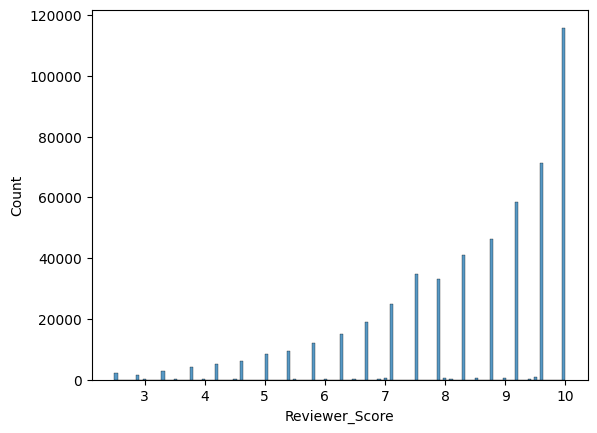

In [ ]:
sns.histplot(hotelrev_df["Reviewer_Score"])

Este histograma permite observar que existe una alta concentración de comentarios positivos, y teniendo en cuenta la proporción de opiniones positivas y negativas, y la posibilidad de que un usuario puede presentar ambos tipos de comentarios, la existencia de comentarios negativas no excluye la posibilidad de tener puntajes altos. En este sentido, esto reafirma que es probable que para el agrupamiento, más que la presencia de opiniones positivas o negativas, sean temáticas o experiencias de los usuarios en sus reseñas lo que determinará el agrupamiento.

Ahora, teniendo en cuenta las características del problema que se debe solucinar con los métodos no supervisados, es importante realizar un conteo de las palabras más frecuentes entre las opiniones de los ususarios. En este sentido, se procede a hacer una copia del set de datos con el cual se venía haciendo la exploración anterior.

In [ ]:
import pandas as pd
from google.colab import drive
hotelesdf=hotelrev_df.copy()

Ahora bien, se procede a hacer un conteo de las palabras más frecuentes con Sklearn con Count Vectorizer. Para esto, se construye una función de contador de palabras, se filtran las opiniones efectivas, excluyendo las "No Negative" y "No Positive". Por último, se grafica en barras las 20 palabras más comunes entre los Tags, las opiniones positivas y las negativas. De este ejercicio, se puede apreciar que la recurrencia de las palabras no necesariamente coincide entre las opiniones positivas y negativas. Lo cual permite observar la petinencia de seguir con esta línea de procesamiento de texto para realizar el proceso de clasificación.

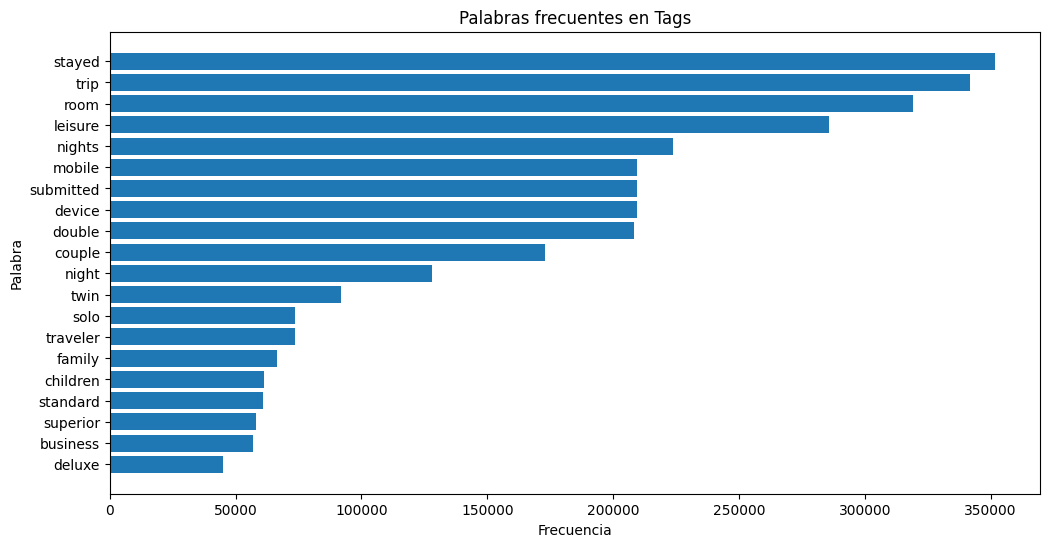

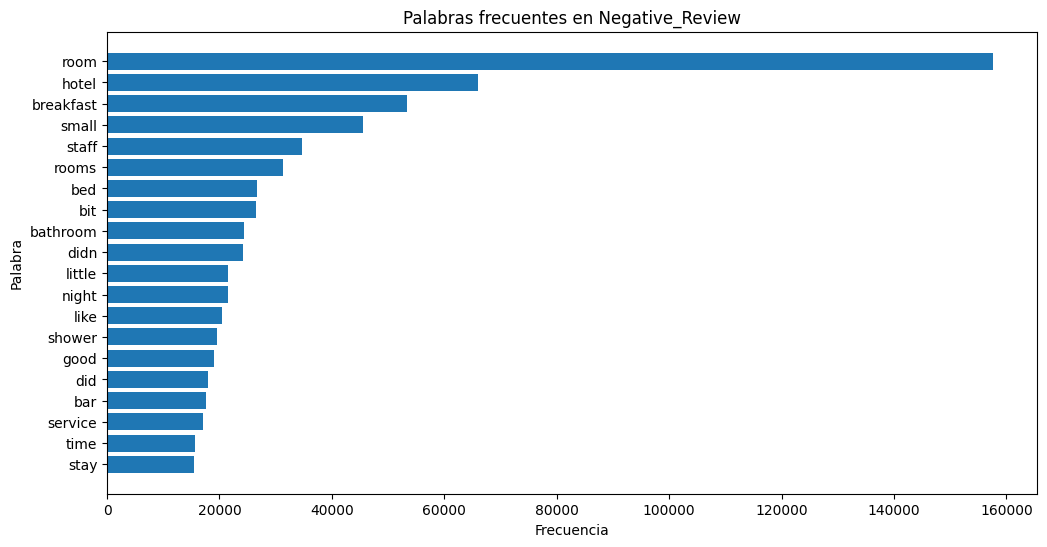

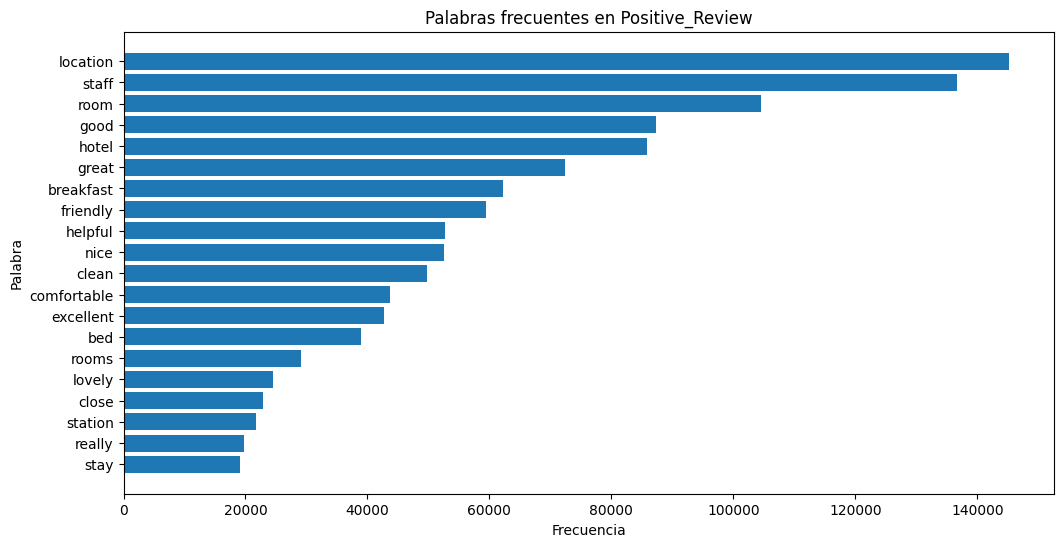

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#se define una función para contar las palabras con Count Vectorizer, así como en la limpieza de las "stop words"
def contador_palabras(column):
    vectorizer = CountVectorizer(stop_words='english')
    palabras_contadas = vectorizer.fit_transform(column)
    palabras = vectorizer.get_feature_names_out()
    frecuencias = np.asarray(palabras_contadas.sum(axis=0)).ravel()
    indice_palabras = np.argsort(frecuencias)[::-1]
    return palabras, frecuencias, indice_palabras

# se procede a filtrar las opiniones para excluir las que aunque aparecen como negativas, no tienen contenido. Igualmente con las positivas
filtro_opiniones = hotelesdf[(hotelesdf['Negative_Review'] != 'No Negative') &
                                     (hotelesdf['Positive_Review'] != 'No Positive')]

# Se obtienen las palabras con mayor frecuencia en las opiniones
tags_palabras, tags_frecuencias, tags_indices = contador_palabras(filtro_opiniones['Tags'])
negative_palabras, negative_frecuencias, negative_indices = contador_palabras(filtro_opiniones['Negative_Review'])
positive_palabras, positive_frecuencias, positive_indices = contador_palabras(filtro_opiniones['Positive_Review'])

# Se realiza el gráfico de las preguntas más frecuentes en los tags, las opiniones positivas y negativas

def plot_frecuencia_palabras(palabras, frecuencias, indices, title):
    n = 20
    top_palabras = [palabras[idx] for idx in indices[:n]]
    top_frecuencias = frecuencias[indices][:n]

    plt.figure(figsize=(12, 6))
    plt.barh(range(n), top_frecuencias, align='center')
    plt.yticks(range(n), top_palabras)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_frecuencia_palabras(tags_palabras, tags_frecuencias, tags_indices, 'Palabras frecuentes en Tags')
plot_frecuencia_palabras(negative_palabras, negative_frecuencias, negative_indices, 'Palabras frecuentes en Negative_Review')
plot_frecuencia_palabras(positive_palabras, positive_frecuencias, positive_indices, 'Palabras frecuentes en Positive_Review')

Por ejemplo, en las opiniones negativas las palabras que se repiten más de 40.000 veces están room, hotel, breakfast y small. Lo cual es consistente con identificar aspectos que pueden estar relacionados con experiencias negativas. Por el contrario, en las opiniones positivas, se encuentran más palabras con esta cantidad de repeticiones: location, staff, room, good, hotel, great, breakfast, friendly, helful, nice, clean, comfortable y excellent. Esto lleva a pensar que hay mayor concentración entre palabras positivas que en las negativas. Este es un elemento que deberá ser tenido en cuenta a la hora de determinar los clústeres.  

Ahora bien, un asunto importante es poder identificar el número de palabras únicas entre las opiniones positivas, negativas y los tags. Esto, en tanto porque al momento de la implementación de la hipótesis tendrá un efecto directo en la dimensionalidad del set de datos. Lo cual implicará definir procesos para reducir la dimensionaldiad con el fin de contar con proceso de agrupamiento. En este ejercicio, se evidencia que en términos de tags existen 587 palabras únicas, en las opiniones negativas 51.617 y en las positivas 42.566.

Esto es consistente con el hallazgo de que hay repetición en palabras entre las opiniones positivas más que en las negativas. Aunque existen más opiniones positivas que negativas, las palabras únicas son más en las negativas que en las positivas. Lo que inicialmente podría pensarse en que existen más factores por los cuales se generan experiencias negativas, que por las que se generan las positivas. Lo cual debe verificarse en la implementación de la hipótesis.

In [ ]:
def contador_palabras_unicas(column):
    vectorizer = CountVectorizer(stop_words='english')
    palabras_contadas = vectorizer.fit_transform(column)
    palabras_unicas = vectorizer.vocabulary_
    num_unicas_palabras = len(palabras_unicas)
    return num_unicas_palabras

def dimensionalidad():
    # se excluyen los de "No Negative" y "No Positive"
    filtro_datos = hotelesdf[(hotelesdf['Negative_Review'] != 'No Negative') & (hotelesdf['Positive_Review'] != 'No Positive')]

    # Se obtienen los datos de interés de tags, opiniones positivas y negativas
    tags = filtro_datos['Tags']
    negative_review = filtro_datos['Negative_Review']
    positive_review = filtro_datos['Positive_Review']

    # Se procede a contar palabras únicas en cada columna
    num_palabras_unicas_tags = contador_palabras_unicas(tags)
    num_palabras_unicas_negative = contador_palabras_unicas(negative_review)
    num_palabras_unicas_positive = contador_palabras_unicas(positive_review)

    print(f"Número de palabras únicas en Tags: {num_palabras_unicas_tags}")
    print(f"Número de palabras únicas en Negative_Review: {num_palabras_unicas_negative}")
    print(f"Número de palabras únicas en Positive_Review: {num_palabras_unicas_positive}")

dimensionalidad()

Número de palabras únicas en Tags: 587
Número de palabras únicas en Negative_Review: 51617
Número de palabras únicas en Positive_Review: 42655


Ahora, al observar las nubes de palabras resultantes del conteo de las de palabras, se puede plantear que es necesario en la implementación de la hipótesis seleccionada, buscar procedimientos que reduzcan la dimensionalidad del set de datos. Para esto, será necesario determinar la estrategia más pertinente para esto.

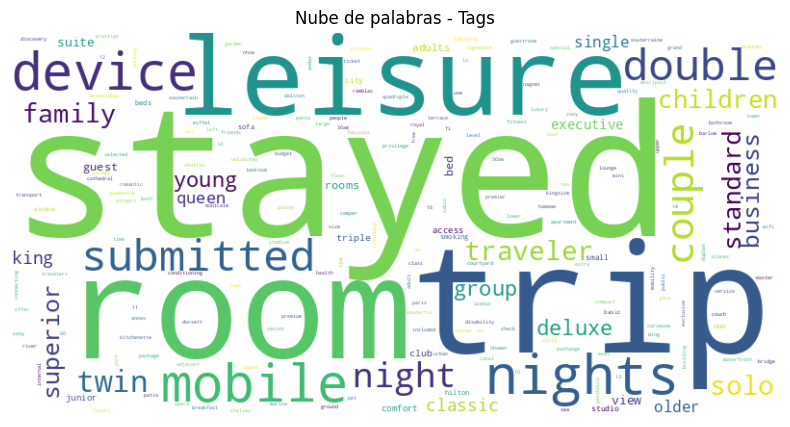

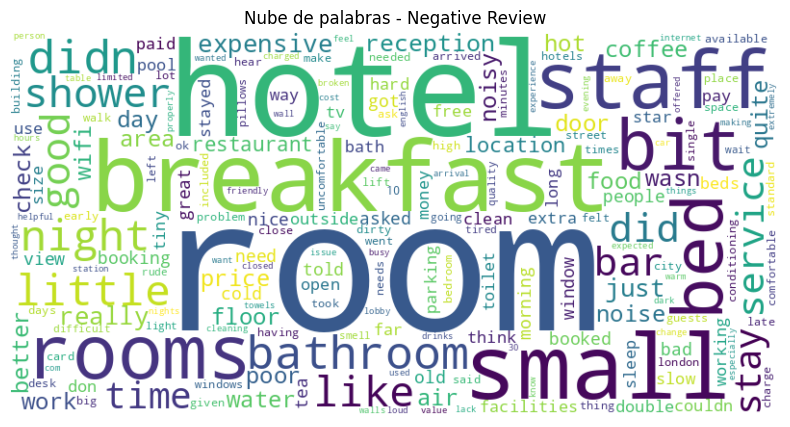

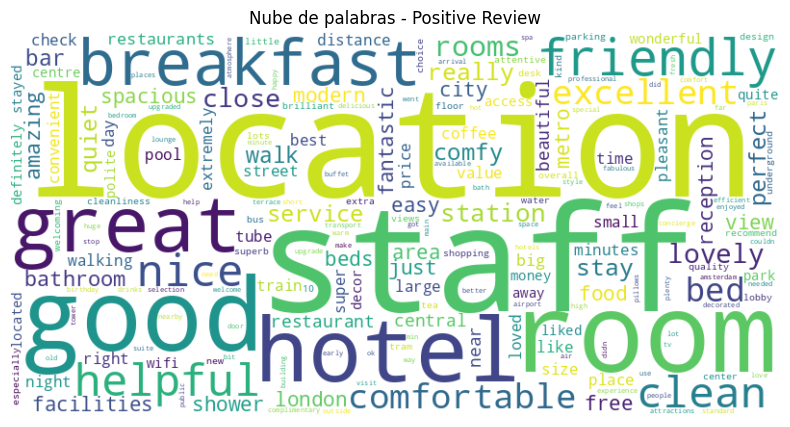

In [ ]:
from wordcloud import WordCloud


def generar_nube(palabras, frecuencias, title):
    wordcloud_data = {word: frequency for word, frequency in zip(palabras, frecuencias)}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generar_nube(tags_palabras, tags_frecuencias, 'Nube de palabras - Tags')
generar_nube(negative_palabras, negative_frecuencias, 'Nube de palabras - Negative Review')
generar_nube(positive_palabras, positive_frecuencias, 'Nube de palabras - Positive Review')

#### **3.2 Criterios de evaluación para cada técnica**

La evaluación de los modelos K-means, Clustering Jerárquico y DBSCAN se basa en la cohesión y la separación de los grupos generados. La cohesión se refiere a qué tan cerca están los puntos dentro de un mismo grupo, mientras que la separación mide la distancia entre los grupos y con esto se evalúa la buena clasificación a partir de una marcada diferencia entre los grupos.

En el caso del modelo K-means, se tiene la inercia que es una métrica que evalúa la cohesión, mide la suma de las distancias al cuadrado de cada punto dentro de su grupo asignado. Un valor más bajo de inercia indica una mayor cohesión dentro de los grupos. Otra métrica es el coeficiente de silueta y es útil para evaluar la cohesión y la separación. Con el coeficiente de silueta se calcula la cohesión y la separación de los puntos dentro de cada grupo, proporcionando una medida global de la calidad del agrupamiento. También se puede utilizar la matriz de proximidad para visualizar la similitud o distancia entre los puntos y comprender mejor la estructura del clustering.

Para el clustering Jerárquico, se puede utilizar el dendrograma el cual es una herramienta visual que sirve para evaluar la cohesión y la separación. A través de una gráfica permite observar cómo los clusters se fusionan y cómo se separan, lo que proporciona información sobre la estructura de los datos y la calidad del clustering jerárquico. Otra forma de medir es con el coeficiente de correlación cofenética el cual es una métrica específica que evalúa la correlación entre las distancias originales de los puntos y las distancias cofenéticas obtenidas a partir del dendrograma. Para conocer la escala de medición de un coeficiente de correlación cofenética se tiene que entre más cercano a 1 esto indica una mejor preservación de la estructura original de los datos.

Ahora para la técnica de DBSCAN, la evaluación se centra en la capacidad del algoritmo para encontrar grupos con alta cohesión y separación adecuada. Nuevamente el coeficiente de silueta puede ser utilizado para medir la calidad de los grupos generados, evaluando tanto la cohesión como la separación. Además, la métrica de densidad y la visualización del espacio de densidad pueden ayudar a evaluar la cohesión de los grupos y la capacidad de DBSCAN para detectar regiones densas y separar áreas de baja densidad.

#### **3.3 Parámetros necesarios para cada una de las técnicas**

En ***K-medias*** se tienen los parámetros de número de grupos (k) el cual es el número de grupos en los que se dividirán los datos. Este parámetro debe ser definido por el usuario y puede ser seleccionado previamente o mediante técnicas como la validación cruzada o método del codo.

Otro parámetro son los centroides iniciales son puntos que representan el centro de cada grupo. La elección de los centroides iniciales puede afectar los resultados del clustering. Las estrategias comunes son la inicialización aleatoria, la inicialización basada en muestras aleatorias.

En el ***Clustering Jerárquico***, el método de enlace determina cómo se calcula la distancia entre los grupos durante el proceso de fusión. Algunos métodos comunes son el enlace completo, el enlace único y el enlace promedio. La elección del método de enlace puede afectar la estructura y la calidad de los grupos resultantes.

Criterio de fusión con este se determina la forma en que se decide cuándo fusionar dos grupos. Algunos criterios comunes son la distancia máxima, la distancia mínima y el promedio de las distancias. La elección del criterio de fusión también puede influir en la estructura de los grupos generados.

Para el caso de ***DBSCAN*** el parámetro de épsilon se fiere a la distancia máxima que se considera para definir la vecindad de un punto. Para este caso los puntos dentro de una distancia definida se consideran vecinos directos. La elección del epsilon puede ser crítica y depende de la naturaleza de los datos. Puedes utilizar técnicas como el gráfico de k-distancia para seleccionar un valor adecuado.

El parámetro de mínimos puntos representa el número mínimo de puntos que deben estar dentro de la vecindad de un punto para que se considere un núcleo. Estos puntos se utilizan para expandir el cluster. Este valor debe ser seleccionado teniendo en cuenta la densidad esperada de los grupos.


#### **3.3 Elección de la hipótesis y descarte: elección K-medias**

De acuerdo con el proceso de entendimiento de los datos y la discusión que se ha planteado frente a este conjunto de datos, se considera que la hipótesis más prometedora para el desarrollo de este caso es la ***K-medias***. Las principales razones para la elección de esta son:
- De acuerdo con la exploración realizada la agrupación de las reseñas de los usuarios podría tener una tendencia a ser de carácter temático, por lo cual el enfoque de K-medias en torno a centroídes podrá tener mayor afinidad para delimitar temas claves a la hora de correr el algoritmo seleccionado. Adicionalmente, el enfoque experimental del método permitirá realizar procesos iterativos para evaluar el desempeño del modelo con distintos número de k.
-Este modelo versus el modelo jerárquico y el DBSCAN es menos exigente computacionalmente y de más fácil interpretabilidad, lo cual permite optimizar los recursos en el proceso de exploración y búsqueda de patrones que permitan identificar los grupos. En este sentido, el método de K-medias permite realizar un primer ejercicio de trabajo sobre el data set que posteriormente puede complementarse con otros métodos a partir de sus hallazgos.
- A pesar de que K-medias puede ser sensible a la alta dimensionalidad que tendría el data set con el tratamiento requerido, los riesgos pueden mitigarse al incorporarse estrategias de limpieza de texto como la lematización y la eliminación de palabras de baja relevancia.

Las razones por las cuales se decidió descartar el ***DBSCAN*** son:
- Como se mencionó, el costo computacional y la dificultad para la interpretación de los datos, llevan a que se haya inclinado por el método de k-medias.
- A pesar de que de antemano en este método no se debe definir el número de clústeres, lo cual en algunas oportunidades representa una ventaja, en este caso y teniendo en cuenta las características del set de datos en términos del número de palabras, las temáticas posibles que determinen el agrupamiento, etc., se optó por un proceso más experimental que permita en las iteraciones ir comparando el comportamiento del algoritmo.

Por su lado, frente al ***clustering jerárquico*** los argumentos por los cuales se descarta son:
- Teniendo en cuenta la alta dimensionalidad del conjunto de datos, este modelo puede llevar a problemas de lecturabilidad de los resultados. Esto toda vez que la cantidad de palabras implicaría retos para la interpretación del dendrograma. Adicionalmente, teniendo en cuenta la idea de que lo que determinará el agrupamiento son temáticas, no resultará fácil definir el punto de corte óptimo teniendo en cuenta que esos temas pueden quedar anidados en subclústeres que sean difíciles de identificar.
